### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [1]:
import numpy as np
import pandas as pd

### Series from lists

In [2]:
# string
country = ["India", "Russia", "Japan", "Nepal", "Srilanka"]

pd.Series(country)

0       India
1      Russia
2       Japan
3       Nepal
4    Srilanka
dtype: object

In [3]:
# integers
runs = [10, 20, 30, 40, 50]

runs_ser = pd.Series(runs)
runs_ser

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [4]:
runs_ser.shape, runs_ser.ndim, runs_ser.size, type(runs_ser)

((5,), 1, 5, pandas.core.series.Series)

In [5]:
# custom index
marks = [67, 57, 89, 100]
subjects = ["Maths", "English", "Science", "Hindi"]

pd.Series(marks, index=subjects)

Maths       67
English     57
Science     89
Hindi      100
dtype: int64

In [6]:
# setting a name
marks = pd.Series(marks, index=subjects, name="¥@$#'s marks")
marks

Maths       67
English     57
Science     89
Hindi      100
Name: ¥@$#'s marks, dtype: int64

### Series from dict

In [7]:
marks = {"Maths": 67, "English": 57, "Science": 89, "Hindi": 100}

marks_series = pd.Series(marks, name="¥@$#'s marks")
marks_series

Maths       67
English     57
Science     89
Hindi      100
Name: ¥@$#'s marks, dtype: int64

### Series Attributes

In [8]:
marks_series

Maths       67
English     57
Science     89
Hindi      100
Name: ¥@$#'s marks, dtype: int64

In [9]:
# size
marks_series.size

4

In [10]:
# dtype
marks_series.dtype

dtype('int64')

In [11]:
# name
marks_series.name

"¥@$#'s marks"

In [12]:
# is_unique
print(marks_series.is_unique)

pd.Series([1, 1, 2, 3, 4, 5]).is_unique

True


False

In [13]:
# index
marks_series.index

Index(['Maths', 'English', 'Science', 'Hindi'], dtype='object')

In [14]:
runs_ser

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [15]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

In [16]:
# values
marks_series.values, marks_series.keys()

(array([ 67,  57,  89, 100]),
 Index(['Maths', 'English', 'Science', 'Hindi'], dtype='object'))

### Series using read_csv

In [17]:
# with one col
subs = pd.read_csv("./data/s16/subs.csv")
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [18]:
type(subs)  # because read_csv returns DataFrame by default

pandas.core.frame.DataFrame

In [19]:
subs = pd.read_csv("./data/s16/subs.csv").squeeze()  # to convert DataFrame to Series
print(type(subs))
subs

<class 'pandas.core.series.Series'>


0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [20]:
# with 2 cols
vk = pd.read_csv(
    "./data/s16/kohli_ipl.csv", index_col="match_no"
).squeeze()  # set index column
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [21]:
movies = pd.read_csv("./data/s16/bollywood.csv", index_col="movie").squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

### Series methods

In [22]:
# head and tail
subs.head()

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [23]:
vk.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int64

In [24]:
vk.tail(10)

match_no
206     0
207     0
208     9
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [25]:
# sample
movies.sample(5)

movie
Raman Raghav 2.0          Nawazuddin Siddiqui
Krazzy 4                          Juhi Chawla
Mumbai Can Dance Saala          Shakti Kapoor
Meeruthiya Gangsters          Jaideep Ahlawat
Murder 3                        Randeep Hooda
Name: lead, dtype: object

In [26]:
# value_counts -> movies
movies.value_counts()

lead
Akshay Kumar            48
Amitabh Bachchan        45
Ajay Devgn              38
Salman Khan             31
Sanjay Dutt             26
                        ..
Tanishaa Mukerji         1
Tanuja                   1
Ankit                    1
Rakhee Gulzar            1
Geetika Vidya Ohlyan     1
Name: count, Length: 566, dtype: int64

In [27]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [28]:
vk.sort_values(ascending=False)

match_no
128    113
126    109
123    108
120    100
164    100
      ... 
93       0
130      0
206      0
207      0
211      0
Name: runs, Length: 215, dtype: int64

In [29]:
# sort_values
vk.sort_values(ascending=False).head(1).values[0]

np.int64(113)

In [30]:
# sort_index -> inplace -> movies
movies.sort_index(ascending=False, inplace=True)

In [31]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [32]:
vk.sort_values(inplace=True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [33]:
vk = vk.copy()
vk.sort_values(inplace=True)
vk

match_no
8        0
87       0
93       0
91       0
206      0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

### Series Maths Methods

In [34]:
# count
vk.count()

np.int64(215)

In [35]:
# sum, product
subs.sum(), subs.product()

(np.int64(49510), np.int64(0))

In [36]:
# mean, median, mode, std, var
print(subs.mean())
print("*" * 25)
print(vk.median())
print("*" * 25)
print(movies.mode())
print("*" * 25)
print(subs.std())
print("*" * 25)
print(vk.var())

135.64383561643837
*************************
24.0
*************************
0    Akshay Kumar
Name: lead, dtype: object
*************************
62.67502303725269
*************************
688.0024777222342


In [37]:
# min/max
subs.max()

396

In [38]:
# describe
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

### Series Indexing

In [39]:
# integer indexing
x = pd.Series([12, 13, 14, 35, 46, 57, 58, 79, 9])
x

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

In [40]:
x[0]  # like dictionary, series[key/label]

np.int64(12)

In [41]:
# negative indexing, will not work because it looks for key => -1 which is not present
x[-1]

KeyError: -1

In [ ]:
x

In [ ]:
# better practice
print(x.iloc[-1])  # series[position]
print(x.loc[0])  # series[key/label]

In [42]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [43]:
marks_series[
    -1
]  # works because pandas sometimes treats -1 as position. Future pandas may treat it strictly as label

C:\Users\YASH\AppData\Local\Temp\ipykernel_8256\2487868625.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marks_series[


np.int64(100)

In [44]:
# slicing
vk[5:16]

match_no
207    0
135    0
130    0
211    0
106    1
204    1
113    1
77     1
1      1
5      1
75     1
Name: runs, dtype: int64

In [45]:
# negative slicing
vk[-5:]

match_no
164    100
120    100
123    108
126    109
128    113
Name: runs, dtype: int64

In [46]:
# prefer iloc, loc
vk.iloc[-5:]

match_no
164    100
120    100
123    108
126    109
128    113
Name: runs, dtype: int64

In [47]:
movies[::2]

movie
Zor Lagaa Ke...Haiya!         Meghan Jadhav
Zindagi Tere Naam        Mithun Chakraborty
Zindagi 50-50                   Veena Malik
Zinda (film)                    Sanjay Dutt
Zid (2014 film)              Mannara Chopra
                                ...        
3 Storeys                       Aisha Ahmed
3 Deewarein                Naseeruddin Shah
22 Yards                        Barun Sobti
1971 (2007 film)             Manoj Bajpayee
1920: London                  Sharman Joshi
Name: lead, Length: 750, dtype: object

In [48]:
# fancy indexing
vk[[1, 3, 4, 5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [49]:
vk.iloc[[1, 3, 4, 5]]

match_no
87     0
91     0
206    0
207    0
Name: runs, dtype: int64

In [50]:
# indexing with labels -> fancy indexing
movies["Uri: The Surgical Strike"]

'Vicky Kaushal'

### Editing Series

In [51]:
marks_series

Maths       67
English     57
Science     89
Hindi      100
Name: ¥@$#'s marks, dtype: int64

In [52]:
# using indexing
marks_series[1] = 100
marks_series

C:\Users\YASH\AppData\Local\Temp\ipykernel_8256\3621369324.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[1] = 100


Maths       67
English    100
Science     89
Hindi      100
Name: ¥@$#'s marks, dtype: int64

In [53]:
# what if an index does not exist
marks_series["SS"] = 100

In [54]:
marks_series

Maths       67
English    100
Science     89
Hindi      100
SS         100
Name: ¥@$#'s marks, dtype: int64

In [55]:
runs_ser

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [56]:
# slicing
runs_ser[2:4] = [100, 100]
runs_ser

0     10
1     20
2    100
3    100
4     50
dtype: int64

In [57]:
# fancy indexing
runs_ser[[0, 3, 4]] = [0, 0, 0]
runs_ser

0      0
1     20
2    100
3      0
4      0
dtype: int64

In [58]:
# using index label
movies["Uri: The Surgical Strike"] = "Paresh Rawal"
movies["Uri: The Surgical Strike"]

'Paresh Rawal'

### Series with Python Functionalities

In [59]:
# len/type/dir/sorted/max/min
print(len(subs), end="\n" + "*" * 25 + "\n")
print(type(subs), end="\n" + "*" * 25 + "\n")
print(dir(subs), end="\n" + "*" * 25 + "\n")
print(sorted(subs), end="\n" + "*" * 25 + "\n")
print(min(subs), end="\n" + "*" * 25 + "\n")
print(max(subs), end="\n" + "*" * 25 + "\n")

365
*************************
<class 'pandas.core.series.Series'>
*************************
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__firstlineno__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__',

In [60]:
# type conversion
list(marks_series)

[67, 100, 89, 100, 100]

In [61]:
dict(marks_series)

{'Maths': np.int64(67),
 'English': np.int64(100),
 'Science': np.int64(89),
 'Hindi': np.int64(100),
 'SS': np.int64(100)}

In [62]:
# membership operator

"Uri: The Surgical Strike" in movies

True

In [63]:
"Paresh Rawal" in movies.values

True

In [64]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [65]:
# looping
for i in movies.index:
    print(i)

Zor Lagaa Ke...Haiya!
Zokkomon
Zindagi Tere Naam
Zindagi Na Milegi Dobara
Zindagi 50-50
Zindaggi Rocks
Zinda (film)
Zila Ghaziabad
Zid (2014 film)
Zero (2018 film)
Zeher
Zed Plus
Zameer: The Fire Within
Zameen (2003 film)
Zamaanat
Yuvvraaj
Yuva
Yun Hota Toh Kya Hota
Youngistaan
Yeh Saali Aashiqui
Yeh Mera India
Yeh Lamhe Judaai Ke
Yeh Khula Aasmaan
Yeh Jawaani Hai Deewani
Yeh Hai India
Yeh Hai Bakrapur
Yeh Dooriyan
Yeh Dil
Yatra (2007 film)
Yamla Pagla Deewana: Phir Se
Yamla Pagla Deewana
Yakeen (2005 film)
Yadvi – The Dignified Princess
Yaaram (2019 film)
Ya Rab
Xcuse Me
Woodstock Villa
Woh Lamhe...
Why Cheat India
What's Your Raashee?
What the Fish
Well Done Abba
Welcome to Sajjanpur
Welcome Back (film)
Welcome 2 Karachi
Welcome (2007 film)
Wedding Pullav
Wedding Anniversary
Waris Shah: Ishq Daa Waaris
War Chhod Na Yaar
Waqt: The Race Against Time
Wanted (2009 film)
Wake Up Sid
Wake Up India
Wajah Tum Ho
Waiting (2015 film)
Waisa Bhi Hota Hai Part II
Wah Taj
Wafa: A Deadly Love Story

In [66]:
# Arithmetic Operators(Broadcasting)
100 + marks_series

Maths      167
English    200
Science    189
Hindi      200
SS         200
Name: ¥@$#'s marks, dtype: int64

In [67]:
# Relational Operators

vk >= 50

match_no
8      False
87     False
93     False
91     False
206    False
       ...  
164     True
120     True
123     True
126     True
128     True
Name: runs, Length: 215, dtype: bool

### Boolean Indexing on Series

In [68]:
# Find no of 50's and 100's scored by kohli
vk[vk >= 50].size, vk[vk == 100].size

(50, 2)

In [69]:
# find number of ducks
vk[vk == 0].size

9

In [70]:
# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

59

In [71]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

### Plotting Graphs on Series

<Axes: >

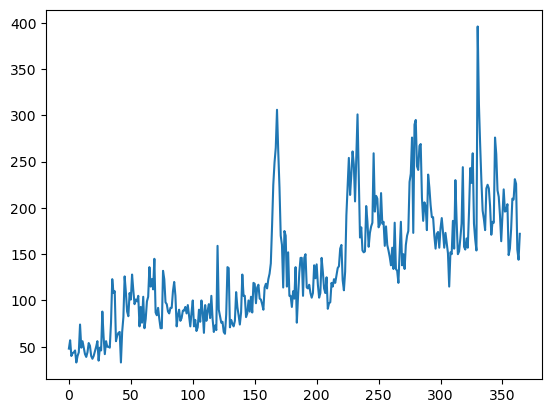

In [72]:
subs.plot()

<Axes: ylabel='count'>

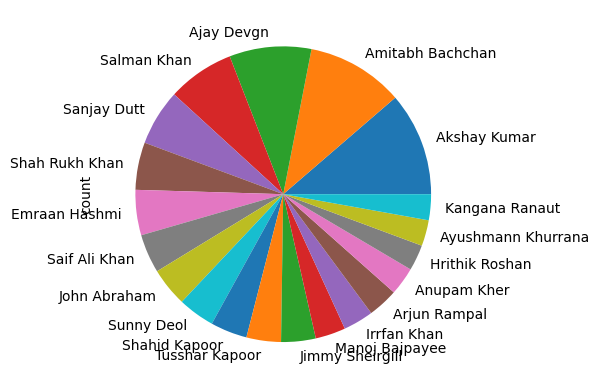

In [73]:
movies.value_counts().head(20).plot(kind="pie")

### Some Important Series Methods

In [74]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [75]:
import numpy as np
import pandas as pd

In [76]:
subs = pd.read_csv("./data/s16/subs.csv").squeeze()
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [77]:
vk = pd.read_csv("./data/s16/kohli_ipl.csv", index_col="match_no").squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [78]:
movies = pd.read_csv("./data/s16/bollywood.csv", index_col="movie").squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [79]:
# astype
import sys

sys.getsizeof(vk)  # size in bytes

3472

In [80]:
sys.getsizeof(vk.astype("int16"))

2182

In [81]:
# between, find number of matches where kohli scored between 51 and 99
vk[vk.between(51, 99)].size

43

In [82]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [83]:
# clip, it limits the values to a specified range
subs.clip(100, 200)

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [84]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [85]:
# drop_duplicates
temp = pd.Series([1, 1, 2, 2, 3, 3, 4, 4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [86]:
temp.drop_duplicates(keep="last")

1    1
3    2
5    3
7    4
dtype: int64

In [87]:
temp.duplicated().sum()

np.int64(4)

In [88]:
vk.duplicated().sum()

np.int64(137)

In [89]:
movies.duplicated().sum()

np.int64(934)

In [90]:
movies.drop_duplicates()

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Sssshhh...                              Tanishaa Mukerji
Rules: Pyaar Ka Superhit Formula                  Tanuja
Right Here Right Now (film)                        Ankit
Talaash: The Hunt Begins...                Rakhee Gulzar
The Pink Mirror                          Edwin Fernandes
Name: lead, Length: 566, dtype: object

In [91]:
temp = pd.Series([1, 2, 3, np.nan, 5, 6, np.nan, 8, np.nan, 10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [92]:
temp.size

10

In [93]:
temp.count()  # counts non-null values

np.int64(7)

In [94]:
# isnull
temp.isnull().sum()

np.int64(3)

In [95]:
# dropna
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

In [96]:
# fillna
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

In [97]:
vk[(vk == 49) | (vk == 99)]

match_no
82    99
86    49
Name: runs, dtype: int64

In [98]:
# isin
vk[vk.isin([49, 99])]

match_no
82    99
86    49
Name: runs, dtype: int64

In [99]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [100]:
# apply
movies.apply(lambda x: x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [101]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [102]:
subs.mean()

np.float64(135.64383561643837)

In [103]:
subs.apply(lambda x: "good day" if x > subs.mean() else "bad day")

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

In [104]:
# copy

In [105]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [106]:
new = vk.head()

In [107]:
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [108]:
new[1] = 10
new

match_no
1    10
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [109]:
new = vk.head().copy()

In [110]:
new[1] = 100

In [111]:
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [112]:
vk

match_no
1      10
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64